# sprint 公開されている実装を動かす

## 1.このSprintについて

**Sprintの目的**

- 公開されている実装を動かす際のノウハウを得る
- 論文で読んだ手法を動かしてみる

**どのように学ぶか**

論文で読んだ手法の公開されている実装を実際に動かしていきます。

## 2.Faster R-CNN

Faster R-CNN[1]の実装を動かします。


[1]Ren, S., He, K., Girshick, R., Sun, J.: Faster r-cnn: Towards real-time object detection with region proposal networks. In: Advances in neural information processing systems. (2015) 91–99


[https://arxiv.org/pdf/1506.01497.pdf](https://arxiv.org/pdf/1506.01497.pdf)


以下のものを使用してください。Kerasを使用した実装です。


[duckrabbits/ObjectDetection at master](https://github.com/duckrabbits/ObjectDetection/tree/master)

## 【問題1】学習と推定
READMEを参考に上記実装を動かしてください。

In [ ]:
!pip install tensorflow==1.15.0

     |████████████████████████████████| 412.3MB 24kB/s 
     |████████████████████████████████| 51kB 5.6MB/s 
     |████████████████████████████████| 512kB 35.3MB/s 
     |████████████████████████████████| 3.8MB 31.6MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp37-none-any.whl size=7540 sha256=62fc9f3b67688b198e30a24a270c1568a8e16cc9cf5b2743e12de9ccba356024
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
ERROR: tensorflow-probability 0.12.1 has requirement gast>=0.3.2, but you'll have gast 0.2.2 which is incompatible.
  Found existing installation: tensorflow-estimator 2.4.0
    Uninstalling tensorflow-estimator-2.4.0:
      Successfully uninstalled tensorflow-estimator-2.4.0
  Found existing installation: gast 0.3.3
    Uninstalling gast-0.3.3:
      Successfully uninstalled gast-0.3.3
  Found existing installation: tensorboard 2.4.1
    Uninstalling tensorboard-2.4.1:
      Successfully uninsta

In [ ]:
!pip install keras==2.2.4 

     |████████████████████████████████| 317kB 5.1MB/s 
  Found existing installation: Keras 2.4.3
    Uninstalling Keras-2.4.3:
      Successfully uninstalled Keras-2.4.3


In [ ]:
import tensorflow

In [ ]:
tensorflow.__version__

'1.15.0'

In [ ]:
!pip install kaggle

In [ ]:
# 自分のマイドライブにマウントする

from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
!mkdir .kaggle # 隠しフォルダ

In [ ]:
!ls -a

.  ..  .config	drive  .kaggle	sample_data


# New Section

In [ ]:
# https://www.kaggle.com/　へアクセスし、ログイン後に右上のプロフィール画像をクリック、さらに"My Account"をクリックする
# このサイトの「API」項目にある"Create New API Token"をクリックすると、kaggle.jsonファイルが自動的にダウンロードされる
# ローカルで、kaggle.json（ダウンロードフォルダにあるはず）をエディターで開く。
# このセルの以下のコードにある token = {'username':'***','key':'***'} における「***」部分を、
# ダウンロードしたkaggle.jsonを参照して書き換え、このセルを実行する

import json

token = {"username":"削除済み","key":"削除済み"}
with open('/content/.kaggle/kaggle.json', 'w') as file:
    json.dump(token, file)

In [ ]:
# 権限の変更
!chmod 600 /content/.kaggle/kaggle.json

In [ ]:
!pwd

/content


In [ ]:
!ls -a .kaggle

ls: cannot access '.kaggle': No such file or directory


In [ ]:
!mkdir /root/.kaggle/

In [ ]:
!cp -R /content/.kaggle/kaggle.json /root/.kaggle/

In [ ]:
!ls -a /root/.kaggle/

.  ..  kaggle.json


In [ ]:
# kaggle APIコマンドが使えるかどうかを確認


!kaggle competitions list

ref                                            deadline             category            reward  teamCount  userHasEntered  
---------------------------------------------  -------------------  ---------------  ---------  ---------  --------------  
contradictory-my-dear-watson                   2030-07-01 23:59:00  Getting Started     Prizes        100           False  
gan-getting-started                            2030-07-01 23:59:00  Getting Started     Prizes        209           False  
tpu-getting-started                            2030-06-03 23:59:00  Getting Started  Knowledge        484           False  
digit-recognizer                               2030-01-01 00:00:00  Getting Started  Knowledge       3329           False  
titanic                                        2030-01-01 00:00:00  Getting Started  Knowledge      26812            True  
house-prices-advanced-regression-techniques    2030-01-01 00:00:00  Getting Started  Knowledge       6752            True  
connectx

In [ ]:
# カレントディレクトリの変更

import os

os.chdir('/content/drive/My Drive/')

# カレントディレクトリの取得
print(os.getcwd())

/content/drive/My Drive


In [ ]:
# simpsonデータセットのAPIコマンドでデータセットをダウンロードする
# APIコマンドはこちらのサイトを参照。https://www.kaggle.com/alexattia/the-simpsons-characters-dataset

!kaggle datasets download -d alexattia/the-simpsons-characters-dataset --force

 98% 1.06G/1.08G [00:06<00:00, 174MB/s]
100% 1.08G/1.08G [00:06<00:00, 182MB/s]


In [ ]:
!unzip /content/drive/'My Drive'/the-simpsons-characters-dataset.zip  -d Simpsons

ストリーミング出力は最後の 5000 行に切り捨てられました。
  inflating: Simpsons/simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1270.jpg  
  inflating: Simpsons/simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1271.jpg  
  inflating: Simpsons/simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1272.jpg  
  inflating: Simpsons/simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1273.jpg  
  inflating: Simpsons/simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1274.jpg  
  inflating: Simpsons/simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1275.jpg  
  inflating: Simpsons/simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1276.jpg  
  inflating: Simpsons/simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1277.jpg  
  inflating: Simpsons/simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1278.jpg  
  inflating: Simpsons/simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1279.jpg  
  inflating: Simpsons/simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1280.jpg  
  inflating: Simpsons/simpsons_dataset/simpsons_dataset

In [ ]:
!git clone https://github.com/duckrabbits/ObjectDetection.git

Cloning into 'ObjectDetection'...
remote: Enumerating objects: 21, done.
remote: Counting objects: 100% (21/21), done.
remote: Compressing objects: 100% (19/19), done.
remote: Total 49 (delta 4), reused 9 (delta 2), pack-reused 28
Unpacking objects: 100% (49/49), done.


In [ ]:
# https://github.com/duckrabbits/ObjectDetection/tree/master
# この後、上述のgithubのreadmeに沿って、simpsons_datasetフォルダをプロジェクトフォルダ配下に格納しましょう。
# testデータなども同様に準備してみよう。

In [ ]:
# 解凍したsimpsons_datasetフォルダをプロジェクトフォルダ配下に格納
!mv Simpsons/simpsons_dataset ObjectDetection/

mv: cannot stat 'Simpsons/simpsons_dataset': No such file or directory


In [ ]:
%cd ObjectDetection/

/content/drive/My Drive/ObjectDetection


In [ ]:
# 学習
!python train.py -p annotation.txt

Using TensorFlow backend.
Parsing annotation files
Training images per class (19 classes) :
{'abraham_grampa_simpson': 687,
 'apu_nahasapeemapetilon': 206,
 'bart_simpson': 650,
 'bg': 0,
 'charles_montgomery_burns': 650,
 'chief_wiggum': 209,
 'comic_book_guy': 208,
 'edna_krabappel': 212,
 'homer_simpson': 718,
 'kent_brockman': 213,
 'krusty_the_clown': 429,
 'lisa_simpson': 756,
 'marge_simpson': 629,
 'milhouse_van_houten': 210,
 'moe_szyslak': 403,
 'ned_flanders': 675,
 'nelson_muntz': 219,
 'principal_skinner': 614,
 'sideshow_bob': 201}
-------------------------------
path to config file : ./save/train_20210326-075516_config.pickle
-------------------------------









Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLaye

In [ ]:
! python predict.py -i ./test_data -c ./save/train_20210326-075516_config.pickle

Using TensorFlow backend.










2021-03-29 12:58:19.953087: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA
2021-03-29 12:58:19.957961: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2199995000 Hz
2021-03-29 12:58:19.958390: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x55aead063d40 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2021-03-29 12:58:19.958432: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version
2021-03-29 12:58:19.962666: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2021-03-29 12:58:20.102941: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:983] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA no

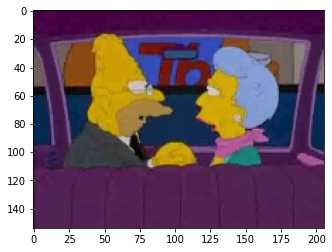

In [ ]:
#coding:utf-8
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
#Jupyterでインライン表示するための宣言
%matplotlib inline
#画像の読み込み
im = Image.open("output/result_abraham_grampa_simpson_44.jpg.png")
#画像をarrayに変換
im_list = np.asarray(im)
#貼り付け
plt.imshow(im_list)
#表示
plt.show()

**30epochに増やしたが、全然学習ができていなかったようだ。**

## 【問題2】コードリーディング
上記実装のコードリーディングを行ってください。


まず、Faster R-CNN[1]において重要だと考えた部分を列挙してください。そして、それに対応するコードを見つけてください。


（例）


- RPNを実現しているコードはどこか
- RoIプーリングを実現しているコードはどこか

フレームワークには畳み込み層など一般的なものはクラスが用意されていますが、RoIプーリングなど特定の手法限定のものは用意されていません。オリジナルのレイヤーを作成することが可能であり、Kerasであれば以下のページに情報がまとまっています。


[オリジナルのKerasレイヤーを作成する - Keras Documentation](https://keras.io/ja/layers/writing-your-own-keras-layers/)


《参考》


KerasではVGG16のクラスが用意されているため、簡単に利用ができます。include_top=Falseの引数を与えることで、出力のための全結合層部分が除かれます。weights='imagenet'でImageNetを利用した学習済みモデルも手に入り、転移学習 が行えます。weights='None'とすればランダムな初期化となります。


[Applications - Keras Documentation](https://keras.io/ja/applications/#vgg16)



**RPNを実現しているコードはどこか?**

⇒model/resnet.py内のrpn関数

In [ ]:
def rpn(base_layers,num_anchors):

    x = Convolution2D(512, (3, 3), padding='same', activation='relu', kernel_initializer='normal', name='rpn_conv1')(base_layers)

    x_class = Convolution2D(num_anchors, (1, 1), activation='sigmoid', kernel_initializer='uniform', name='rpn_out_class')(x)
    x_regr = Convolution2D(num_anchors * 4, (1, 1), activation='linear', kernel_initializer='zero', name='rpn_out_regress')(x)

    return [x_class, x_regr, base_layers]

**RoIプーリングを実現しているコードはどこか**

⇒model/RoIPoolingConv.pyで実装




In [ ]:
from keras.engine.topology import Layer
import keras.backend as K

if K.backend() == 'tensorflow':
    import tensorflow as tf

class RoiPoolingConv(Layer):
    '''ROI pooling layer for 2D inputs.
    See Spatial Pyramid Pooling in Deep Convolutional Networks for Visual Recognition,
    K. He, X. Zhang, S. Ren, J. Sun
    # Arguments
        pool_size: int
            Size of pooling region to use. pool_size = 7 will result in a 7x7 region.
        num_rois: number of regions of interest to be used
    # Input shape
        list of two 4D tensors [X_img,X_roi] with shape:
        X_img:
        `(1, channels, rows, cols)` if dim_ordering='th'
        or 4D tensor with shape:
        `(1, rows, cols, channels)` if dim_ordering='tf'.
        X_roi:
        `(1,num_rois,4)` list of rois, with ordering (x,y,w,h)
    # Output shape
        3D tensor with shape:
        `(1, num_rois, channels, pool_size, pool_size)`
    '''

        # 下略

Using TensorFlow backend.


⇒model/resnet.pyでインスタンス化、呼び出す

In [ ]:
from model.RoiPoolingConv import RoiPoolingConv

def classifier(base_layers, input_rois, num_rois, nb_classes = 21, trainable=False):

    pooling_regions = 14
    input_shape = (num_rois,14,14,1024)
    out_roi_pool = RoiPoolingConv(pooling_regions, num_rois)([base_layers, input_rois])
    out = classifier_layers(out_roi_pool, input_shape=input_shape, trainable=True)

    out = TimeDistributed(Flatten())(out)

    out_class = TimeDistributed(Dense(nb_classes, activation='softmax', kernel_initializer='zero'), name='dense_class_{}'.format(nb_classes))(out)
    # note: no regression target for bg class
    out_regr = TimeDistributed(Dense(4 * (nb_classes-1), activation='linear', kernel_initializer='zero'), name='dense_regress_{}'.format(nb_classes))(out)
    return [out_class, out_regr]

## 3.YOLOv3

シンプソンズのデータセットをFaster R-CNN以外の手法で学習・推定を行います。YOLOv3[2]のKeras実装を使います。


[qqwweee/keras-yolo3: A Keras implementation of YOLOv3 (Tensorflow backend)](https://github.com/qqwweee/keras-yolo3)


[2]Jeseph Redmon, Ali Farhadi. YOLOv3: An Incremental Improvement


[https://pjreddie.com/media/files/papers/YOLOv3.pdf](https://pjreddie.com/media/files/papers/YOLOv3.pdf)



## 【問題3】学習済みの重みによる推定
学習済みの重みを使い推定を行う方法がREADME.mdのQuick Startの項に記載されています。


まずはこの通りにして各自何かしらの画像や動画に対して検出を行ってください。


出力結果を課題の一部として提出してください。

In [ ]:
pwd

'/content/drive/My Drive/ObjectDetection'

In [ ]:
# カレントディレクトリの変更

import os

os.chdir('/content/drive/My Drive/')

# カレントディレクトリの取得
print(os.getcwd())

/content/drive/My Drive


In [ ]:
!git clone https://github.com/qqwweee/keras-yolo3.git

Cloning into 'keras-yolo3'...
remote: Enumerating objects: 144, done.
remote: Total 144 (delta 0), reused 0 (delta 0), pack-reused 144
Receiving objects: 100% (144/144), 151.08 KiB | 5.81 MiB/s, done.
Resolving deltas: 100% (65/65), done.


In [ ]:
# カレントディレクトリの変更

os.chdir('/content/drive/My Drive/keras-yolo3')

# カレントディレクトリの取得
print(os.getcwd())

/content/drive/My Drive/keras-yolo3


In [ ]:
!wget https://pjreddie.com/media/files/yolov3.weights

--2021-03-26 08:37:29--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights’

yolov3.weights      100%[===================>] 236.52M  43.8MB/s    in 5.8s    

2021-03-26 08:37:35 (40.8 MB/s) - ‘yolov3.weights’ saved [248007048/248007048]



In [ ]:
!python convert.py yolov3.cfg yolov3.weights model_data/yolo.h5

Using TensorFlow backend.
Loading weights.
Weights Header:  0 2 0 [32013312]
Parsing Darknet config.
Creating Keras model.


Parsing section net_0
Parsing section convolutional_0
conv2d bn leaky (3, 3, 3, 32)




2021-03-26 08:38:19.533025: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA
2021-03-26 08:38:19.537514: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2199995000 Hz
2021-03-26 08:38:19.537694: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x560923a1ca00 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2021-03-26 08:38:19.537723: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version
2021-03-26 08:38:19.539417: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2021-03-26 08:38:19.667248: I tenso

In [ ]:
! python yolo_video.py --image

Using TensorFlow backend.
Image detection mode
 Ignoring remaining command line arguments: ./path2your_video,



2021-03-26 08:50:01.423280: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA
2021-03-26 08:50:01.427702: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2199995000 Hz
2021-03-26 08:50:01.427907: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x555ffaf84a00 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2021-03-26 08:50:01.427936: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version
2021-03-26 08:50:01.429557: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2021-03-26 08:50:01.554392: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:983] successful NUMA node read from SysFS had negati

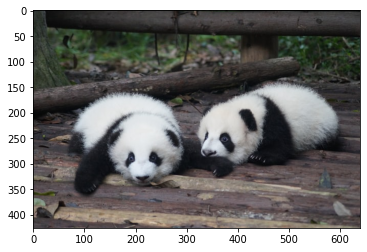

In [ ]:
im = Image.open("image/pascal-muller-4EajIuUxgAQ-unsplash.jpg")
im_list = np.asarray(im)
plt.imshow(im_list)
plt.show()

**Google Colabの関係で、バウンディングボックスのある写真出力ができなかったが、以下のように入力写真から検出できたようだ。（1枚目の写真に対して）**

- Found 2 boxes for img
- bear 0.57 (317, 140) (601, 318)
- bear 0.59 (75, 169) (293, 350)

## 【問題4】学習のためのファイルを作成
新しいデータ（シンプソンズデータセット）を学習します。README.mdのTrainingの項を読み、シンプソンズデータセットを学習するために必要なファイルを作成してください。


アノテーションファイルの形式が問題1の実装とは異なるため変換する必要があります。

In [ ]:
# カレントディレクトリの変更

os.chdir('/content/drive/My Drive/ObjectDetection')

# カレントディレクトリの取得
print(os.getcwd())

/content/drive/My Drive/ObjectDetection


In [ ]:
# annotation.txtを編集するために一旦DataFrame形式に変換
import pandas as pd

train = pd.read_csv('annotation.txt' , header=None)
train

,0,1,2,3,4,5
0,simpsons_dataset/abraham_grampa_simpson/pic_00...,57,72,52,72,abraham_grampa_simpson
1,simpsons_dataset/abraham_grampa_simpson/pic_00...,80,31,337,354,abraham_grampa_simpson
2,simpsons_dataset/abraham_grampa_simpson/pic_00...,128,48,285,407,abraham_grampa_simpson
3,simpsons_dataset/abraham_grampa_simpson/pic_00...,72,126,158,275,abraham_grampa_simpson
4,simpsons_dataset/abraham_grampa_simpson/pic_00...,123,61,294,416,abraham_grampa_simpson
...,...,...,...,...,...,...
7884,simpsons_dataset/moe_szyslak/pic_0160.jpg,21,9,69,75,moe_szyslak
7885,simpsons_dataset/moe_szyslak/pic_0033.jpg,89,8,126,74,moe_szyslak
7886,simpsons_dataset/moe_szyslak/pic_0337.jpg,66,75,196,245,moe_szyslak
7887,simpsons_dataset/moe_szyslak/pic_1067.jpg,159,44,287,247,moe_szyslak


In [ ]:
# model_data配下にclasses.txtファイルを用意(すでにあるvoc_classes.txtファイルを参考に)

classes = train[5].unique()
classes

array(['abraham_grampa_simpson', 'apu_nahasapeemapetilon', 'bart_simpson',
       'charles_montgomery_burns', 'chief_wiggum', 'comic_book_guy',
       'edna_krabappel', 'homer_simpson', 'kent_brockman',
       'krusty_the_clown', 'lisa_simpson', 'marge_simpson',
       'milhouse_van_houten', 'moe_szyslak', 'ned_flanders',
       'nelson_muntz', 'principal_skinner', 'sideshow_bob'], dtype=object)

In [ ]:
# クラスラベルをsimpsons_classes.txtとして出力(train.pyのmodel_data/voc_classes.txtを参照)
import numpy as np

np.savetxt('simpsons_classes.txt', classes, fmt='%s') # 型がデフォルトでは%.18e と浮動小数点型となっているため、文字列の場合は明示的に指定する必要がある

（参考記事）[numpy.arrayをテキスト出力](https://conta.hatenablog.com/entry/2013/12/02/183538)

In [ ]:
# 出力したsimpsons_classes.txtをkeras-yolo3のmodel_dataフォルダに移動

!cp -R /content/drive/MyDrive/ObjectDetection/simpsons_classes.txt /content/drive/MyDrive/keras-yolo3/model_data/

In [ ]:
# README.mdのTraining項の指示に従い、class_idにエンコーダ
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(train[5])
train[5] = le.transform(train[5])
train

,0,1,2,3,4,5
0,simpsons_dataset/abraham_grampa_simpson/pic_00...,57,72,52,72,0
1,simpsons_dataset/abraham_grampa_simpson/pic_00...,80,31,337,354,0
2,simpsons_dataset/abraham_grampa_simpson/pic_00...,128,48,285,407,0
3,simpsons_dataset/abraham_grampa_simpson/pic_00...,72,126,158,275,0
4,simpsons_dataset/abraham_grampa_simpson/pic_00...,123,61,294,416,0
...,...,...,...,...,...,...
7884,simpsons_dataset/moe_szyslak/pic_0160.jpg,21,9,69,75,13
7885,simpsons_dataset/moe_szyslak/pic_0033.jpg,89,8,126,74,13
7886,simpsons_dataset/moe_szyslak/pic_0337.jpg,66,75,196,245,13
7887,simpsons_dataset/moe_szyslak/pic_1067.jpg,159,44,287,247,13


In [ ]:
# README.mdのTraining項の指示に従い、0列目と1列目を結合させる(真ん中はスペース)

train[0] = train[[0, 1]].apply(lambda x: '{} {}'.format(x[0],x[1]), axis=1)
print(train[0][0])
train

simpsons_dataset/abraham_grampa_simpson/pic_0000.jpg 57


,0,1,2,3,4,5
0,simpsons_dataset/abraham_grampa_simpson/pic_00...,57,72,52,72,0
1,simpsons_dataset/abraham_grampa_simpson/pic_00...,80,31,337,354,0
2,simpsons_dataset/abraham_grampa_simpson/pic_00...,128,48,285,407,0
3,simpsons_dataset/abraham_grampa_simpson/pic_00...,72,126,158,275,0
4,simpsons_dataset/abraham_grampa_simpson/pic_00...,123,61,294,416,0
...,...,...,...,...,...,...
7884,simpsons_dataset/moe_szyslak/pic_0160.jpg 21,21,9,69,75,13
7885,simpsons_dataset/moe_szyslak/pic_0033.jpg 89,89,8,126,74,13
7886,simpsons_dataset/moe_szyslak/pic_0337.jpg 66,66,75,196,245,13
7887,simpsons_dataset/moe_szyslak/pic_1067.jpg 159,159,44,287,247,13


（参考記事）[Pandasで複数の列を値をもとに、新しい列を任意の関数で定義する方法](https://blog.shikoan.com/pandas-newcolumn-lambda/)

In [ ]:
# image_file_path列を実際の保存場所のpashに変更

train.iloc[:, 0] = '../ObjectDetection/' + train.iloc[:, 0]
train

,0,1,2,3,4,5
0,../ObjectDetection/simpsons_dataset/abraham_gr...,57,72,52,72,0
1,../ObjectDetection/simpsons_dataset/abraham_gr...,80,31,337,354,0
2,../ObjectDetection/simpsons_dataset/abraham_gr...,128,48,285,407,0
3,../ObjectDetection/simpsons_dataset/abraham_gr...,72,126,158,275,0
4,../ObjectDetection/simpsons_dataset/abraham_gr...,123,61,294,416,0
...,...,...,...,...,...,...
7884,../ObjectDetection/simpsons_dataset/moe_szysla...,21,9,69,75,13
7885,../ObjectDetection/simpsons_dataset/moe_szysla...,89,8,126,74,13
7886,../ObjectDetection/simpsons_dataset/moe_szysla...,66,75,196,245,13
7887,../ObjectDetection/simpsons_dataset/moe_szysla...,159,44,287,247,13


In [ ]:
train[0][0]

'../ObjectDetection/simpsons_dataset/abraham_grampa_simpson/pic_0000.jpg 57'

In [ ]:
# 1列目を削除
train = train.drop(1, axis=1)
train

,0,2,3,4,5
0,../ObjectDetection/simpsons_dataset/abraham_gr...,72,52,72,0
1,../ObjectDetection/simpsons_dataset/abraham_gr...,31,337,354,0
2,../ObjectDetection/simpsons_dataset/abraham_gr...,48,285,407,0
3,../ObjectDetection/simpsons_dataset/abraham_gr...,126,158,275,0
4,../ObjectDetection/simpsons_dataset/abraham_gr...,61,294,416,0
...,...,...,...,...,...
7884,../ObjectDetection/simpsons_dataset/moe_szysla...,9,69,75,13
7885,../ObjectDetection/simpsons_dataset/moe_szysla...,8,126,74,13
7886,../ObjectDetection/simpsons_dataset/moe_szysla...,75,196,245,13
7887,../ObjectDetection/simpsons_dataset/moe_szysla...,44,287,247,13


In [ ]:
# アノテーションファイルをtrain.txtとして出力

train.to_csv('train.txt', sep=',', header=False, index=False)

In [ ]:
# 出力したアノテーションファイルをkeras-yolo3の直下に移動

!cp -R /content/drive/MyDrive/ObjectDetection/train.txt /content/drive/MyDrive/keras-yolo3/

## 【問題5】学習が行えることの確認
問題4で作成したファイルを使用して学習してください。実行環境で学習に時間がかかる場合は、学習が行えることを確認するのみで終えて構いません。

In [ ]:
# カレントディレクトリの変更

os.chdir('/content/drive/MyDrive/keras-yolo3')

# カレントディレクトリの取得
print(os.getcwd())

/content/drive/MyDrive/keras-yolo3


In [ ]:
!python convert.py -w yolov3.cfg yolov3.weights model_data/yolo_weights.h5

Using TensorFlow backend.
Loading weights.
Weights Header:  0 2 0 [32013312]
Parsing Darknet config.
Creating Keras model.


Parsing section net_0
Parsing section convolutional_0
conv2d bn leaky (3, 3, 3, 32)




2021-03-29 04:24:29.245256: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA
2021-03-29 04:24:29.249873: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2199995000 Hz
2021-03-29 04:24:29.250059: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x561e274f6a00 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2021-03-29 04:24:29.250090: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version
2021-03-29 04:24:29.253752: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2021-03-29 04:24:29.452315: I tenso

In [ ]:
# train.pyの_main()関数の中にあるclasses_path = 'model_data/voc_classes.txt'を'simpsons_classes.txt'に変更したうえで学習開始
!python train.py

Using TensorFlow backend.








2021-03-29 04:44:07.042618: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA
2021-03-29 04:44:07.047101: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2199995000 Hz
2021-03-29 04:44:07.047297: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x55568d284a00 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2021-03-29 04:44:07.047327: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version
2021-03-29 04:44:07.049006: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2021-03-29 04:44:07.186113: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:983] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node

**47Epochまで学習できたが、GoogleClabが落ちたので、終了します。**